In [1]:
import backtrader as bt
from backtester import backtest15,backtestday
import numpy as np

import pandas as pd

import logging
logging.basicConfig(filename="log.txt", level=logging.DEBUG)

In [2]:
corrs = []

class trial(bt.Strategy):
    params = (('fast',50),('slow',200),('order_percentage',0.95),('ticker','SPY'))

    
    def log(self, txt):
        date = self.data.datetime.date(0)
        time = self.data.datetime.time()
        logging.debug('%s-%s, %s' % (date.isoformat(), time, txt))
        
        
    def notify_order(self, order):
        
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log("Buy EXECUTED {}".format(order.executed.price))
            elif order.issell():
                self.log("Sell EXECUTED {}".format(order.executed.price))

                
    def __init__(self):
        self.x=0

    def next(self):
#         self.log('hello')
        a =[]
        for j in range(7):
            a.append([])
            for i in range(10):
                a[j].append(self.data.close[-i-j])

        for i in range(7):
            a[i] = np.array(a[i])

        a = np.array(a)
        for i in range(6):
            a[i+1] = (a[i+1]-a[0])/a[0]
        x = a[0]
        a=a[1:]
        a = pd.DataFrame(a)
#         print(a)
        b = a.mean(axis=0)
#         print(b[9])
        cor = np.corrcoef(x,b)[0][1]
        corrs.append(cor)
        if(abs(cor)>0.8 and b[9] < -0.02):
#             print("aa")
            if not self.position:
                a = self.broker.getvalue()/2
                brackets = self.buy_bracket(size=np.round(a/self.data.close[0]),limitprice=self.data.close[0]*1.05, stopprice=self.data.close[0]*0.95)
#                 print(brackets)
        

In [3]:
backtestday('VEDL',trial)

AttributeError: 'NoneType' object has no attribute 'datas'

In [6]:
aa = pd.read_csv('momentum_h2l.csv')

In [9]:
a = []
for t in aa.Tickers:
    x = [t,backtestday(t,trial)]
    print(x)
    a.append(x)

Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.044111708265843)])
Final Portfolio Value: 147875.18
['ADANIGREEN', (1.044111708265843, 47875.18132500016)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.1840543145321833)])
Final Portfolio Value: 161640.25
['SAGARDEEP', (1.1840543145321833, 61640.25390099987)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.19915234687036407)])
Final Portfolio Value: 108421.80
['ADANITRANS', (0.19915234687036407, 8421.799848750015)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.55765957235905)])
Final Portfolio Value: 130709.31
['GANGAFORGE', (0.55765957235905, 30709.30953824993)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.05004520168563931)])
Final Portfolio Value: 104566.06
['BIGBLOC', (0.05004520168563931, 4566.064605749896)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: Ordere

Sharpe Ratio: OrderedDict([('sharperatio', -0.02649041655628541)])
Final Portfolio Value: 101305.97
['JSL', (-0.02649041655628541, 1305.9699687498796)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.021946816248775876)])
Final Portfolio Value: 102669.21
['BALAMINES', (-0.021946816248775876, 2669.211634500025)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.07884998571711303)])
Final Portfolio Value: 101037.34
['VARDMNPOLY', (-0.07884998571711303, 1037.3417462500656)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.3415801545473516)])
Final Portfolio Value: 76667.99
['TGBHOTELS', (-0.3415801545473516, -23332.013190000012)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.3087751169416478)])
Final Portfolio Value: 87322.10
['LYKALABS', (-0.3087751169416478, -12677.895654999971)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperati

Sharpe Ratio: OrderedDict([('sharperatio', -0.8278542279425793)])
Final Portfolio Value: 77494.21
['IMAGICAA', (-0.8278542279425793, -22505.785035000095)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.3862435528969211)])
Final Portfolio Value: 94611.29
['USHAMART', (-0.3862435528969211, -5388.706882249971)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.09182193181591139)])
Final Portfolio Value: 105861.26
['SPLIL', (0.09182193181591139, 5861.2566700000025)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.1898284701048609)])
Final Portfolio Value: 82425.22
['RPOWER', (-0.1898284701048609, -17574.779216250085)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.49770628321358534)])
Final Portfolio Value: 115863.21
['PARACABLES', (0.49770628321358534, 15863.207093749865)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.0614

Sharpe Ratio: OrderedDict([('sharperatio', 0.17541002688285084)])
Final Portfolio Value: 107861.08
['GUJGASLTD', (0.17541002688285084, 7861.081340249948)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.392537625261614)])
Final Portfolio Value: 124890.93
['THEMISMED', (0.392537625261614, 24890.93243724994)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.5685997936328839)])
Final Portfolio Value: 110788.52
['PERSISTENT', (0.5685997936328839, 10788.517224249998)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.33123015039168596)])
Final Portfolio Value: 87857.01
['EKC', (-0.33123015039168596, -12142.990316749958)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.194040421662843)])
Final Portfolio Value: 75376.12
['HUBTOWN', (-1.194040421662843, -24623.875564999995)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.9456357858

Sharpe Ratio: OrderedDict([('sharperatio', -1.418408514667686)])
Final Portfolio Value: 85494.13
['INCREDIBLE', (-1.418408514667686, -14505.871826250004)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.17633384811600417)])
Final Portfolio Value: 110195.50
['UJJIVAN', (0.17633384811600417, 10195.504438499964)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.3477254611161802)])
Final Portfolio Value: 164546.98
['RAJRATAN', (1.3477254611161802, 64546.976344250026)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.23060284421990024)])
Final Portfolio Value: 112309.08
['JINDALSTEL', (0.23060284421990024, 12309.075693500024)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.6036650401993197)])
Final Portfolio Value: 132744.60
['UTTAMSUGAR', (0.6036650401993197, 32744.60095875)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.81504

Sharpe Ratio: OrderedDict([('sharperatio', 1.1145336377559305)])
Final Portfolio Value: 123097.19
['TRENT', (1.1145336377559305, 23097.188526500046)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.4534631015849253)])
Final Portfolio Value: 80749.67
['NILAINFRA', (-0.4534631015849253, -19250.331906250023)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.3290813115459815)])
Final Portfolio Value: 90015.04
['CENTRALBK', (-0.3290813115459815, -9984.957393750024)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.023613991489553243)])
Final Portfolio Value: 102645.69
['IRCTC', (0.023613991489553243, 2645.6939915000257)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.06050859289038729)])
Final Portfolio Value: 103004.44
['AGI', (0.06050859289038729, 3004.444292499975)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.3030070822

Sharpe Ratio: OrderedDict([('sharperatio', -0.5319122947869774)])
Final Portfolio Value: 85785.55
['MAHASTEEL', (-0.5319122947869774, -14214.44660625016)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.4024012347987933)])
Final Portfolio Value: 117034.70
['VISAKAIND', (0.4024012347987933, 17034.695175749977)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.01731906650670212)])
Final Portfolio Value: 101263.29
['RNAVAL', (0.01731906650670212, 1263.2865575000324)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.2830112931759798)])
Final Portfolio Value: 121463.76
['HIRECT', (1.2830112931759798, 21463.758527500016)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.3412488347821443)])
Final Portfolio Value: 115052.68
['SRHHYPOLTD', (0.3412488347821443, 15052.67941425003)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.8773176

Sharpe Ratio: OrderedDict([('sharperatio', 0.18432861427573233)])
Final Portfolio Value: 112012.91
['OILCOUNTUB', (0.18432861427573233, 12012.912352500047)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.5804565201653125)])
Final Portfolio Value: 146909.08
['CENTURYPLY', (0.5804565201653125, 46909.07614025014)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.4657389785599218)])
Final Portfolio Value: 91936.91
['JUBLINDS', (-0.4657389785599218, -8063.092977500026)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.40933002863888907)])
Final Portfolio Value: 107339.19
['AUTOIND', (0.40933002863888907, 7339.194589999883)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.09578251118325048)])
Final Portfolio Value: 100255.09
['SOLARINDS', (-0.09578251118325048, 255.09179925001808)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -

Sharpe Ratio: OrderedDict([('sharperatio', -0.707030004775015)])
Final Portfolio Value: 78273.24
['JKTYRE', (-0.707030004775015, -21726.763830749987)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.6053736210544123)])
Final Portfolio Value: 123378.82
['KAMATHOTEL', (0.6053736210544123, 23378.81742250001)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.070199078925993)])
Final Portfolio Value: 100784.23
['MAXVIL', (-0.070199078925993, 784.2298225000268)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.9311499638873978)])
Final Portfolio Value: 80424.14
['MBLINFRA', (-0.9311499638873978, -19575.86295000017)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.9429612205046803)])
Final Portfolio Value: 151847.17
['ASIANTILES', (0.9429612205046803, 51847.17065349987)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.267796722564

Sharpe Ratio: OrderedDict([('sharperatio', -1.0498580620543088)])
Final Portfolio Value: 70223.09
['DHANI', (-1.0498580620543088, -29776.90712399999)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.3231658616922242)])
Final Portfolio Value: 116387.93
['LAXMIMACH', (0.3231658616922242, 16387.934043749934)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.06899464873678669)])
Final Portfolio Value: 104979.07
['ASHOKA', (0.06899464873678669, 4979.068872500036)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.7325175139166913)])
Final Portfolio Value: 149885.26
['SAREGAMA', (0.7325175139166913, 49885.26373400004)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.1011445594553622)])
Final Portfolio Value: 47273.15
['VIDEOIND', (-1.1011445594553622, -52726.85238250005)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.37242170183

Sharpe Ratio: OrderedDict([('sharperatio', -0.7630891093805455)])
Final Portfolio Value: 70182.01
['NCC', (-0.7630891093805455, -29817.992365250044)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.06598880915568943)])
Final Portfolio Value: 90903.51
['BRFL', (-0.06598880915568943, -9096.492140000002)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.5614645814218885)])
Final Portfolio Value: 266171.15
['NITINFIRE', (0.5614645814218885, 166171.1512299992)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.7270542561920906)])
Final Portfolio Value: 84785.78
['SHREYANIND', (-0.7270542561920906, -15214.217422000074)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.17365758610835053)])
Final Portfolio Value: 110112.83
['GENESYS', (0.17365758610835053, 10112.83307550002)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.6976248505

Sharpe Ratio: OrderedDict([('sharperatio', 0.5537920487487337)])
Final Portfolio Value: 133288.99
['ADANIPORTS', (0.5537920487487337, 33288.98790024989)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.43463422675683)])
Final Portfolio Value: 73595.83
['A2ZINFRA', (-1.43463422675683, -26404.17265625007)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.7254334549596644)])
Final Portfolio Value: 83989.00
['ARSSINFRA', (-0.7254334549596644, -16011.003031250046)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.2910577691957116)])
Final Portfolio Value: 110988.23
['SCHNEIDER', (0.2910577691957116, 10988.225503749942)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.11104194017231656)])
Final Portfolio Value: 106391.79
['TATACOFFEE', (0.11104194017231656, 6391.786395249961)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.81392

Sharpe Ratio: OrderedDict([('sharperatio', -0.9927040701007326)])
Final Portfolio Value: 75777.15
['SELAN', (-0.9927040701007326, -24222.8522522501)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.8101241705401753)])
Final Portfolio Value: 74566.22
['CEREBRAINT', (-0.8101241705401753, -25433.78017000007)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.795989003938412)])
Final Portfolio Value: 74570.06
['INTENTECH', (-1.795989003938412, -25429.94087000008)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.9577008243633105)])
Final Portfolio Value: 140211.88
['CYBERTECH', (0.9577008243633105, 40211.88061874997)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.02079827062400945)])
Final Portfolio Value: 94804.19
['ARMANFIN', (-0.02079827062400945, -5195.809963000036)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.049129

Sharpe Ratio: OrderedDict([('sharperatio', -0.1399725226709933)])
Final Portfolio Value: 96384.83
['IEX', (-0.1399725226709933, -3615.1692640000983)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.5571858885559532)])
Final Portfolio Value: 87333.04
['DIAPOWER', (-0.5571858885559532, -12666.95674999994)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.7422539799516423)])
Final Portfolio Value: 135034.48
['JBCHEPHARM', (0.7422539799516423, 35034.48178250011)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.4934550360248591)])
Final Portfolio Value: 126847.22
['WELSPUNIND', (0.4934550360248591, 26847.216580000153)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.1182400436465578)])
Final Portfolio Value: 114866.27
['HINDWAREAP', (1.1182400436465578, 14866.271736749972)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.656718

Sharpe Ratio: OrderedDict([('sharperatio', -0.07375290639371834)])
Final Portfolio Value: 101709.49
['APOLLOHOSP', (-0.07375290639371834, 1709.485416749958)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.546412715008979)])
Final Portfolio Value: 116172.48
['ASTEC', (0.546412715008979, 16172.482744000008)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.5060335528585909)])
Final Portfolio Value: 86026.23
['PNB', (-0.5060335528585909, -13973.770625750069)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.8102634647611137)])
Final Portfolio Value: 164719.44
['LASA', (0.8102634647611137, 64719.44125449989)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.03404953744211214)])
Final Portfolio Value: 101266.58
['EXPLEOSOL', (-0.03404953744211214, 1266.582358499989)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.5564034476988

Sharpe Ratio: OrderedDict([('sharperatio', 0.4946771763070349)])
Final Portfolio Value: 124178.90
['HINDALCO', (0.4946771763070349, 24178.9041805)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.09152875704622473)])
Final Portfolio Value: 101491.78
['BHEL', (-0.09152875704622473, 1491.7802739999897)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.14292753252985604)])
Final Portfolio Value: 95424.24
['LUXIND', (-0.14292753252985604, -4575.755381000112)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.4724504655995507)])
Final Portfolio Value: 91094.69
['BRIGADE', (-0.4724504655995507, -8905.309709749941)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.6019817873922148)])
Final Portfolio Value: 118708.64
['BAJFINANCE', (0.6019817873922148, 18708.644250249927)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.148544982191

Sharpe Ratio: OrderedDict([('sharperatio', 0.5668002188790244)])
Final Portfolio Value: 146045.15
['BYKE', (0.5668002188790244, 46045.14765699988)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.24649628245000194)])
Final Portfolio Value: 94056.35
['DEEPENR', (-0.24649628245000194, -5943.651691250023)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.05757253401928209)])
Final Portfolio Value: 104763.49
['RITES', (0.05757253401928209, 4763.48944975005)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.6661440997984465)])
Final Portfolio Value: 121663.59
['SHALPAINTS', (0.6661440997984465, 21663.593933000026)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.2634844816025781)])
Final Portfolio Value: 87284.96
['JPINFRATEC', (-0.2634844816025781, -12715.038746250037)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.500710491

Sharpe Ratio: OrderedDict([('sharperatio', -0.5673072903024852)])
Final Portfolio Value: 90562.66
['ZENSARTECH', (-0.5673072903024852, -9437.344035499962)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.101527302904831)])
Final Portfolio Value: 96821.13
['ACCELYA', (-1.101527302904831, -3178.8689117500326)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.08514691057247101)])
Final Portfolio Value: 104603.55
['CHOLAFIN', (0.08514691057247101, 4603.549014749966)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.4736073032704989)])
Final Portfolio Value: 118958.34
['MADRASFERT', (0.4736073032704989, 18958.34402874991)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.02012630318718429)])
Final Portfolio Value: 99472.18
['JINDALPOLY', (-0.02012630318718429, -527.8157989999163)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.

Sharpe Ratio: OrderedDict([('sharperatio', 0.5338495847736653)])
Final Portfolio Value: 123984.80
['PRESSMN', (0.5338495847736653, 23984.798445249937)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.8626970315664454)])
Final Portfolio Value: 83702.24
['LOVABLE', (-0.8626970315664454, -16297.75810875)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.05497705342056424)])
Final Portfolio Value: 101133.94
['TIMETECHNO', (-0.05497705342056424, 1133.9352409999265)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.003990492806739258)])
Final Portfolio Value: 102590.61
['TNPETRO', (0.003990492806739258, 2590.6111782499647)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.023879232553446466)])
Final Portfolio Value: 97427.12
['PCBL', (-0.023879232553446466, -2572.882646000042)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.464

Sharpe Ratio: OrderedDict([('sharperatio', 0.1280722597118073)])
Final Portfolio Value: 106016.73
['ITDCEM', (0.1280722597118073, 6016.730946749914)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.7061320291816694)])
Final Portfolio Value: 132701.11
['MANAPPURAM', (0.7061320291816694, 32701.107417250052)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.05592903620854047)])
Final Portfolio Value: 102107.93
['QUICKHEAL', (-0.05592903620854047, 2107.926378500022)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.6474502340575654)])
Final Portfolio Value: 120552.19
['SHREECEM', (0.6474502340575654, 20552.18720499998)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.29809412803262886)])
Final Portfolio Value: 95766.40
['JAMNAAUTO', (-0.29809412803262886, -4233.598718000023)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.4914

Sharpe Ratio: OrderedDict([('sharperatio', -0.3778656268899823)])
Final Portfolio Value: 93708.34
['MUTHOOTCAP', (-0.3778656268899823, -6291.655159999995)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.2015912315183188)])
Final Portfolio Value: 135826.23
['DLF', (1.2015912315183188, 35826.231897249876)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.6932410198278016)])
Final Portfolio Value: 76896.76
['ACCURACY', (-1.6932410198278016, -23103.2416715)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.20439608285138944)])
Final Portfolio Value: 95385.26
['GABRIEL', (-0.20439608285138944, -4614.735826999968)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.19810774810629078)])
Final Portfolio Value: 93731.09
['CAREERP', (-0.19810774810629078, -6268.906795249961)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.77300226041

Sharpe Ratio: OrderedDict([('sharperatio', 0.22489134361171115)])
Final Portfolio Value: 112144.24
['ASAHIINDIA', (0.22489134361171115, 12144.23791599997)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.5020497796415365)])
Final Portfolio Value: 137650.63
['IFBIND', (0.5020497796415365, 37650.63439000002)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.8459776530889584)])
Final Portfolio Value: 81377.85
['BOMDYEING', (-0.8459776530889584, -18622.14586749996)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.1622626324600337)])
Final Portfolio Value: 107922.33
['PAGEIND', (0.1622626324600337, 7922.3321637500485)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.33336965890056763)])
Final Portfolio Value: 112571.58
['DBCORP', (0.33336965890056763, 12571.578857250046)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -3.48754856

Sharpe Ratio: OrderedDict([('sharperatio', -0.4307055027270861)])
Final Portfolio Value: 89728.53
['TATAMETALI', (-0.4307055027270861, -10271.469552500057)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.9400501100959076)])
Final Portfolio Value: 83115.09
['UFO', (-0.9400501100959076, -16884.908468250054)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.4303321837866566)])
Final Portfolio Value: 116139.09
['SHALBY', (0.4303321837866566, 16139.087544250026)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.42843787015424456)])
Final Portfolio Value: 86780.55
['BIRLAMONEY', (-0.42843787015424456, -13219.44589875004)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.17300509599960634)])
Final Portfolio Value: 110108.53
['ASHIMASYN', (0.17300509599960634, 10108.533500000005)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.11

Sharpe Ratio: OrderedDict([('sharperatio', -2.549009123678795)])
Final Portfolio Value: 71839.38
['MAYURUNIQ', (-2.549009123678795, -28160.62336375001)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.126250357817427)])
Final Portfolio Value: 93587.50
['SANCO', (-0.126250357817427, -6412.49542000005)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.17410118142413328)])
Final Portfolio Value: 108352.53
['AKSHARCHEM', (0.17410118142413328, 8352.528193250066)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.9378678083567112)])
Final Portfolio Value: 148890.98
['EPL', (0.9378678083567112, 48890.98158950012)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.2354010799366817)])
Final Portfolio Value: 126492.03
['ALEMBICLTD', (1.2354010799366817, 26492.03095174994)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.721422975730569)]

Sharpe Ratio: OrderedDict([('sharperatio', 1.1187713715063543)])
Final Portfolio Value: 193220.70
['ZODIACLOTH', (1.1187713715063543, 93220.70398825023)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.7280964247306606)])
Final Portfolio Value: 121275.73
['MHRIL', (0.7280964247306606, 21275.731389750086)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.07541646691138965)])
Final Portfolio Value: 104970.88
['MINDACORP', (0.07541646691138965, 4970.878336499911)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -4.750402302909649)])
Final Portfolio Value: 61255.19
['EICHERMOT', (-4.750402302909649, -38744.81008399999)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.4588974584655163)])
Final Portfolio Value: 125232.08
['PILANIINVS', (0.4588974584655163, 25232.08150124998)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -1.61186236

Sharpe Ratio: OrderedDict([('sharperatio', 0.1991171359468448)])
Final Portfolio Value: 113068.39
['LAOPALA', (0.1991171359468448, 13068.387996250036)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.6748073837284191)])
Final Portfolio Value: 95287.48
['INDUSINDBK', (-0.6748073837284191, -4712.518901250078)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.27979597876344525)])
Final Portfolio Value: 109551.84
['BALPHARMA', (0.27979597876344525, 9551.840481499981)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 5.411414178225543)])
Final Portfolio Value: 105216.71
['LIKHITHA', (5.411414178225543, 5216.710909500034)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.053629111932373935)])
Final Portfolio Value: 102257.15
['GODREJAGRO', (-0.053629111932373935, 2257.1508022500057)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.2

Sharpe Ratio: OrderedDict([('sharperatio', 0.49735034832514685)])
Final Portfolio Value: 119571.48
['RAMANEWS', (0.49735034832514685, 19571.47539375005)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.18507685538079757)])
Final Portfolio Value: 111978.91
['KREBSBIO', (0.18507685538079757, 11978.910320250056)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.3330527421573184)])
Final Portfolio Value: 116594.85
['INDIANHUME', (0.3330527421573184, 16594.84928699996)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.44567789932865043)])
Final Portfolio Value: 88737.51
['HCG', (-0.44567789932865043, -11262.490961250063)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.17105224935226435)])
Final Portfolio Value: 108876.63
['KOLTEPATIL', (0.17105224935226435, 8876.634468500051)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.458

Sharpe Ratio: OrderedDict([('sharperatio', -0.8597016597412469)])
Final Portfolio Value: 69160.08
['VIVIMEDLAB', (-0.8597016597412469, -30839.918913500078)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.01267024964523283)])
Final Portfolio Value: 101343.33
['PIONDIST', (0.01267024964523283, 1343.3325949999125)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.1136335585577442)])
Final Portfolio Value: 106311.99
['POWERGRID', (0.1136335585577442, 6311.988885250088)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 0.7301954156723856)])
Final Portfolio Value: 115816.82
['DRREDDY', (0.7301954156723856, 15816.824621749969)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 1.0159402516997145)])
Final Portfolio Value: 125780.78
['TOKYOPLAST', (1.0159402516997145, 25780.780707500046)]
Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -0.25

IndexError: array index out of range

In [10]:
len(a)

1221

In [18]:
sharpe = []
returns = []
tick = []
for i in a:
    sharpe.append(i[1][0])
    returns.append(i[1][1])
    tick.append(i[0])

In [20]:
q = {'ticker':tick,'sharpe':sharpe,'returns':returns}
q = pd.DataFrame(q)
q

,ticker,sharpe,returns
0,ADANIGREEN,1.044112,47875.181325
1,SAGARDEEP,1.184054,61640.253901
2,ADANITRANS,0.199152,8421.799849
3,GANGAFORGE,0.557660,30709.309538
4,BIGBLOC,0.050045,4566.064606
...,...,...,...
1216,OAL,-0.017169,964.680220
1217,CONTROLPR,0.668687,34714.061765
1218,AKZOINDIA,0.516440,16563.889508
1219,KSK,-0.825004,-46281.177103


In [22]:
q[q.sharpe>2]

,ticker,sharpe,returns
78,NITINSPIN,4.122717,40575.733495
126,AVADHSUGAR,2.343807,53244.307707
236,WEBELSOLAR,2.757727,66925.635395
382,TDPOWERSYS,3.769301,49082.748504
386,RELAXO,3.925273,25397.459729
395,CGCL,2.076998,39016.724032
416,ARVSMART,9.738699,20326.594212
432,SRF,2.251960,74375.621575
435,IDBI,3.277726,35861.032594
569,ANGELONE,13.732957,5756.495976


In [27]:
q = q.sort_values(by = ['sharpe'], ascending = False)
q.reset_index(inplace = True)

ValueError: cannot insert level_0, already exists

In [37]:
(q.drop(['level_0','index'],axis=1)).to_csv('trial_sharpe_list.csv')

In [39]:
corrs = []

class conse2(bt.Strategy):
    params = (('fast',50),('slow',200),('order_percentage',0.95),('ticker','SPY'))

    
    def log(self, txt):
        date = self.data.datetime.date(0)
        time = self.data.datetime.time()
        logging.debug('%s-%s, %s' % (date.isoformat(), time, txt))
        
        
    def notify_order(self, order):
        
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log("Buy EXECUTED {}".format(order.executed.price))
            elif order.issell():
                self.log("Sell EXECUTED {}".format(order.executed.price))

                
    def __init__(self):
        pass

    def next(self):
        if not self.position:
            a = self.broker.getvalue()/2
            if(1.01*self.data.close[0]<self.data.open[0] and 1.01*self.data.close[-1]<self.data.open[-1]):
                brackets = self.buy_bracket(size=np.round(a/self.data.close[0]),limitprice=self.data.close[0]*1.02, stopprice=self.data.close[0]*0.99)

Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', -3.2208695300493173)])
Final Portfolio Value: 97668.99


<IPython.core.display.Javascript object>


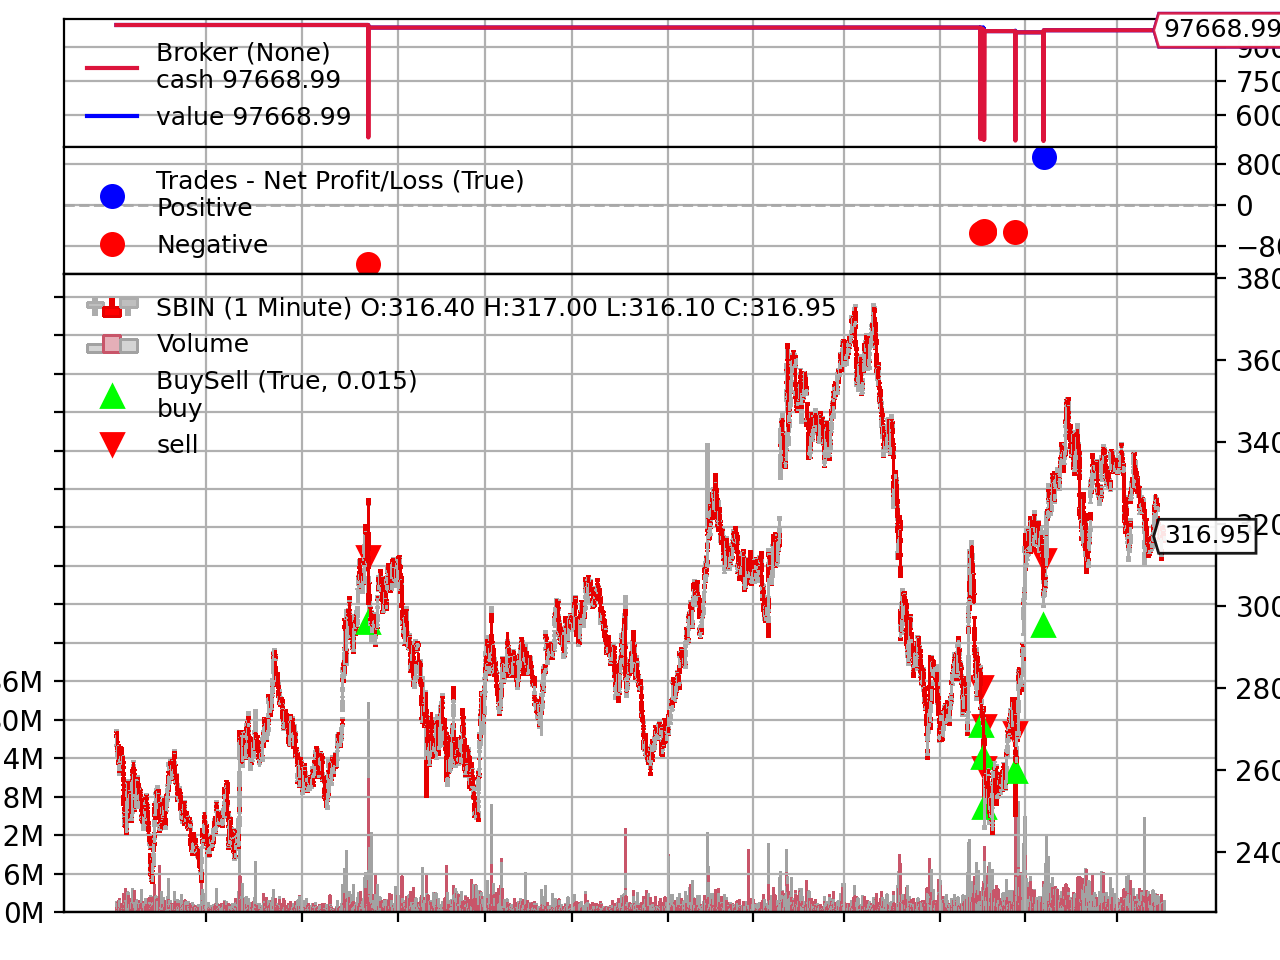

(-3.2208695300493173, -2331.006747499996)

In [40]:
backtest15('SBIN',conse2)

In [14]:
q = pd.read_csv('trial_sharpe_list.csv')

In [17]:
q.returns.mean()

6575.974082544819